### <b><h1><center><font color = 'silver'>Aplikacja mobilna - Twoja szansa na sukces !</font></center></h1></b1>
### <h1><center>✨📱📱📱✨</center></h1> 

Źródło : https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv

<b>Postępowania:</b>
1. W celu weryfikacji 'popularności' aplikacji przeprowadzono badanie gęstości występowania aplikacji względem oceny / liczby recenzji i liczby pobrań dla poszczególbych cech. Zauważalna różnica w rozkładzie jest czynnikiem wartym rozważenia pod kątem 'popularności'.
2. Wyznacznikiem 'popularności' pod kątem cechy 'aplikacja płatna/darmowa' uznano stosunek ilości pobrań aplikacji darmowej do płatnej.
3. W pkt 2 skupiono się na ilości pobrań, gdyż jest to pierwsza główna składowa do analizy popularności aplikacji mobilnych. Jeśli aplikacja jest pobierana, uznaje się że jest znana, a zatem bardziej popularna.
4. Przeprowadzono standaryzację i kategoryzację cechy 'rozmiar aplikacji'. Na tej podstawie pogrupowano aplikacje w klasy rozmiarowe.
5. <font color='green'><b> Finalnym zestawieniem popularności aplikacji jest scoreboard utworzony na bazie rankingu częstości występowań danych cech (Kategoria | Odbiorca | Rozmiar | Aplikacja płatna/ darmowa). Scoreboard został przeprowadzony na kwantylu 0.8 w wystąpieniach, aby odciąć granicę popularnych aplikacji od ogółu. </b></font> 
6. <font color='gold'><b> Na bazie powyższej analizy przygotowano aplikację, która umożliwi porównanie czy nowa aplikacja mobilna ma szansę być popularna i finalnie odnieść sukces. </b></font>



<b> Pod podanym źródłem znajdują się dwa pliki:
1. 'googleplaystore' - baza aplikacji zawierająca informacje: nazwa | typ | rozmiar | kategoria | content rating | ocena | il. recenzji | ilość pobrań
2. 'googleplaystore_user_reviews' - baza recenzji, przydatna do analizy tekstu. Baza ta nie została wykorzystana dla poniższej analizy, natomiast stanowi punkt dalszych rozważań i być może będzie podstawą do przewidywania recenzji nowej aplikacji </b>

In [23]:
from project_functions import *
pass

clean_data()

,App,Type,Size,Category,Content Rating,Rating,Reviews,Installs,Size mb,Size category
0,+Download 4 Instagram Twitter,Free,22M,SOCIAL,Everyone,4.5,40467,1000000,22.000,2.0
1,- Free Comics - Comic Apps,Free,9.1M,COMICS,Mature 17+,3.5,115,10000,9.100,0.0
2,.R,Free,203k,TOOLS,Everyone,4.5,259,10000,0.198,0.0
3,/u/app,Free,53M,COMMUNICATION,Mature 17+,4.7,573,10000,53.000,5.0
4,058.ba,Free,14M,NEWS_AND_MAGAZINES,Everyone,4.4,27,100,14.000,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7025 entries, 0 to 8195
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7025 non-null   object 
 1   Type            7025 non-null   object 
 2   Size            7025 non-null   object 
 3   Category        7025 non-null   object 
 4   Content Rating  7025 non-null   object 
 5   Rating          7025 non-null   float64
 6   Reviews         7025 non-null   int64  
 7   Installs        7025 non-null   int64  
 8   Size mb         7025 non-null   float64
 9   Size category   7025 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 603.7+ KB
None
No of duplicates: 0


<center><ins> W celu analizy usunieto duplikaty, puste wartości oraz dane dla rozmiaru, gdzie nie został on określony. Finalnie bazowano na <font color='pink'>7025 rekordach i 4 głównych cechach składowych </font> ('Type'/ 'Content Rating'/ 'Size mb' / 'Category') </ins></center>

In [34]:
means()

Średnia liczba recenzji aplikacji wynosi: 144750.77
Średnia liczba pobrań aplikacji wynosi: 4472925.07
Średnia ocena aplikacji wynosi: 4.16


,Rating,Reviews,Installs,Size mb
Rating,1.000,0.068,0.048,0.063
Reviews,0.068,1.000,0.596,0.181
Installs,0.048,0.596,1.000,0.132
Size mb,0.063,0.181,0.132,1.000


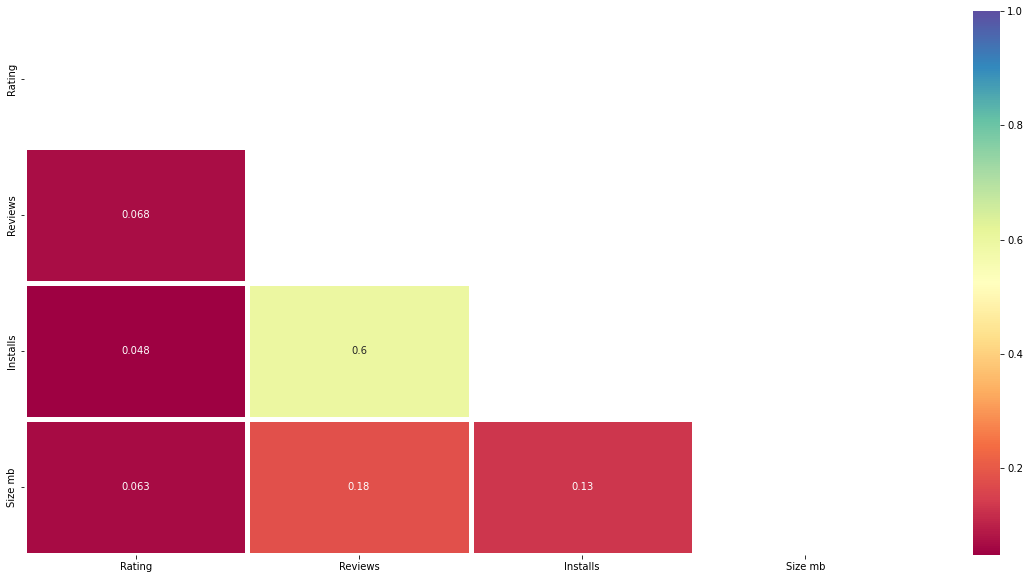

In [35]:
correlation()

<center><b> Na podstawie powyższej analizy korelacji zauważa się, że wszystkie analizowane cechy nie są współzależne. Największa korelacja występuje pomiędzy ilością recenzji, a liczbą pobrań co jest dość oczywiste - ilość recenzji po części wynika z ilości pobrań, natomiast nie oznacza to że każda pobrana aplikacja jest recenzowana </b></center>

<font color = 'orange'><b> Na podstawie analizy gęstości dla cech głównych składowych wymienionych wyżej, wnioskuje się iż kryterium doboru do rankingu w scoreboard będzie stosunek ilosci pobrań aplikacji darmowej do aplikacji płatnych. W przypadku pozostałych cech uznano, że do scoreboard wykorzysta się q = 0.8</b></font>

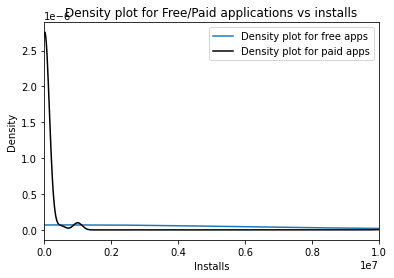

In [36]:
type_charts_installs()

Powyższy wykres pokazuje, że rozkąłdy są zuepłeni inne. Nie wnioskujemy na podstawie powyższego wykresu jakie są różnice - badamy zależność dalej.

In [37]:
mean_ratio()


Ratio - ilość pobrań app darmowej / płatnej: 61.6


Free    7592
Paid     604
Name: Type, dtype: int64


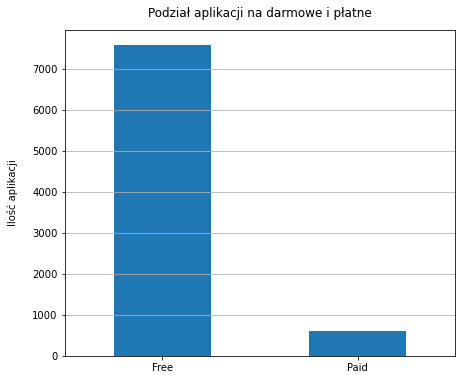

In [38]:
chart_free_type_no()

<b>Badanie cechy 'Category' i 'Content Rating' na wykresie gęśtości (badano w celu porównania zależności i znalezienia specyficznego przypadku):</b>

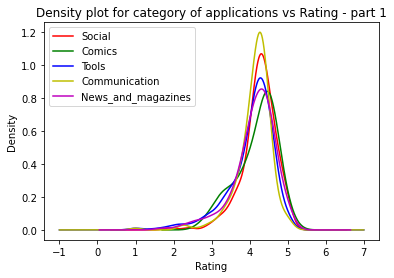

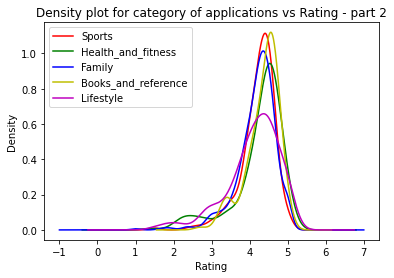

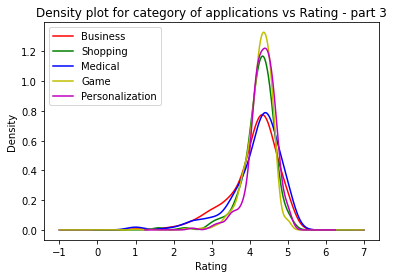

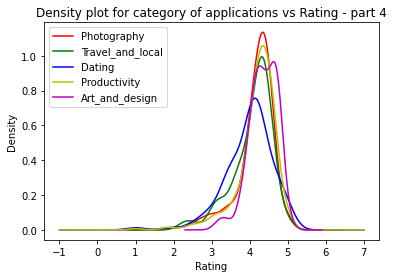

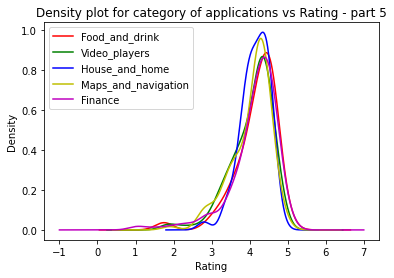

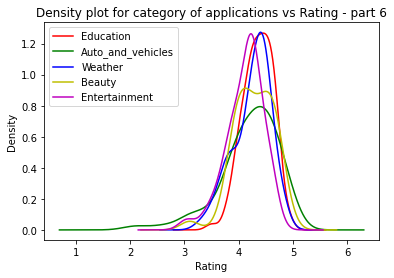

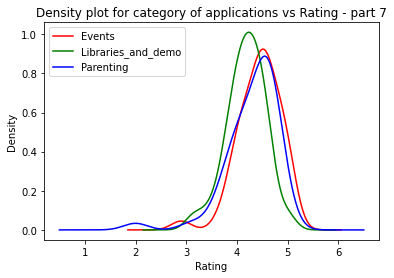

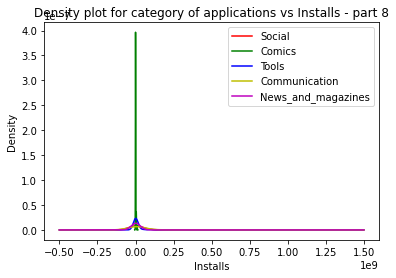

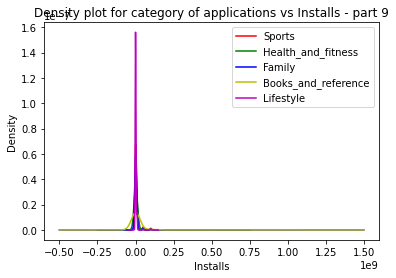

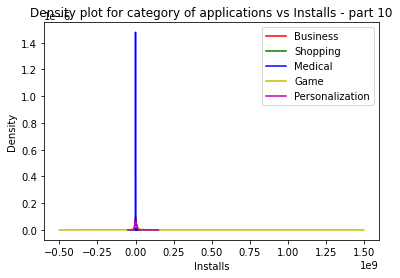

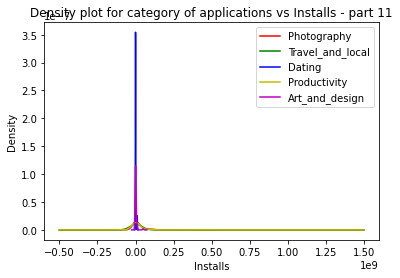

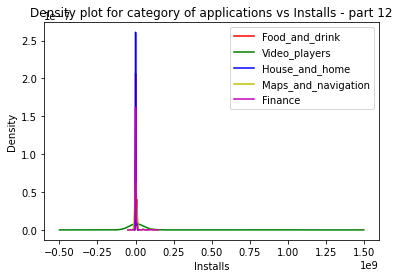

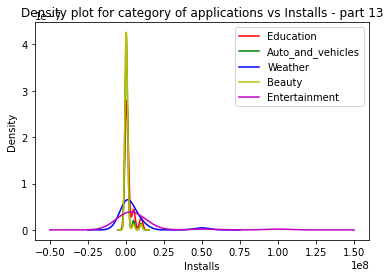

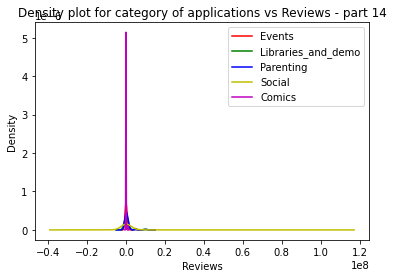

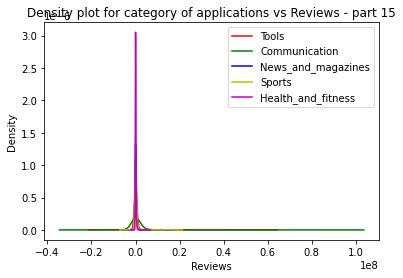

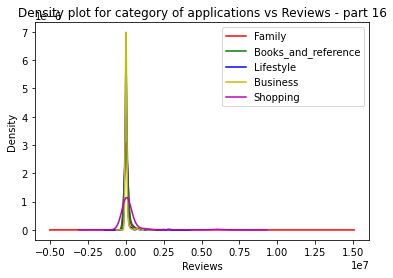

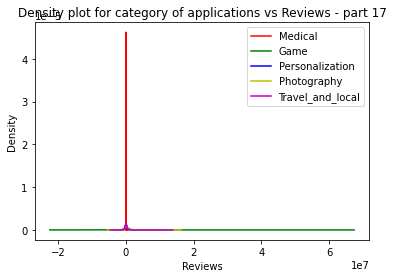

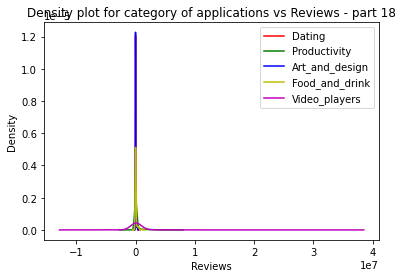

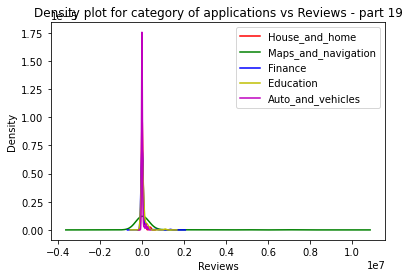

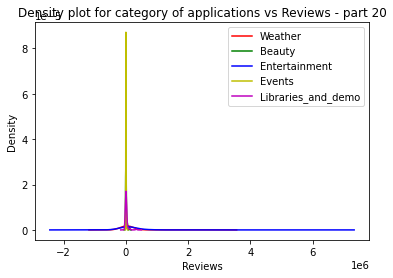

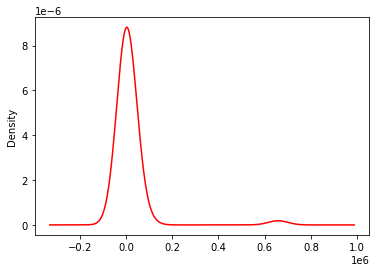

In [39]:
chart_density_app()

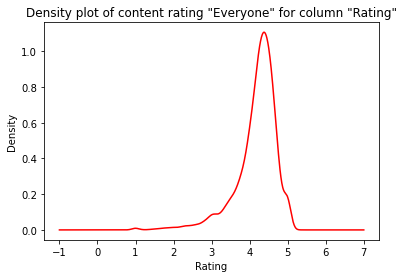

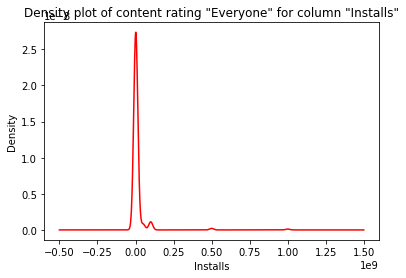

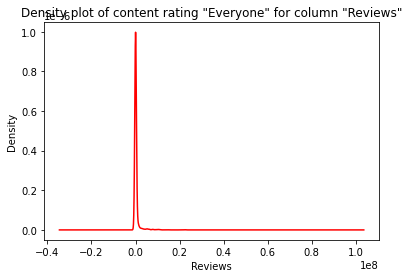

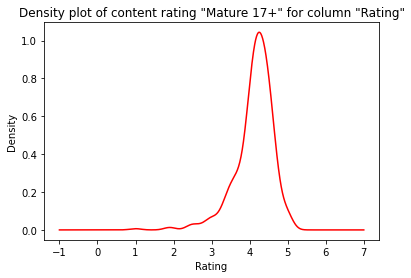

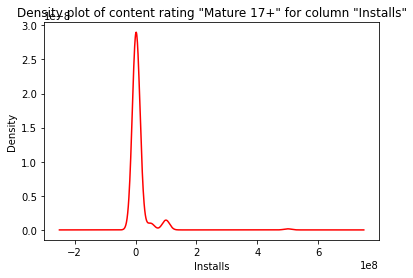

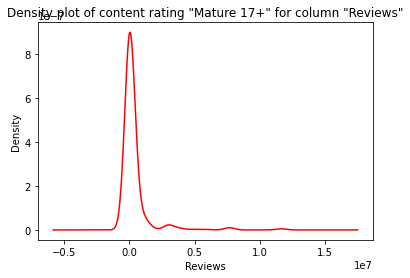

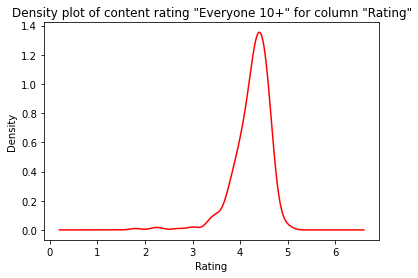

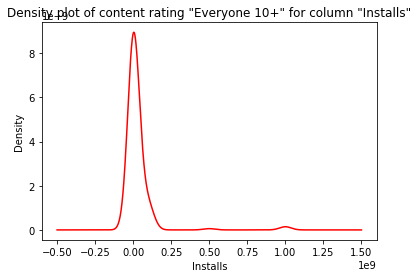

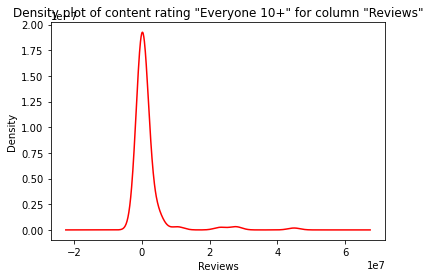

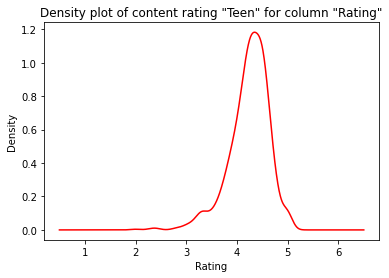

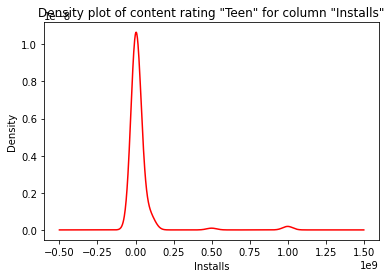

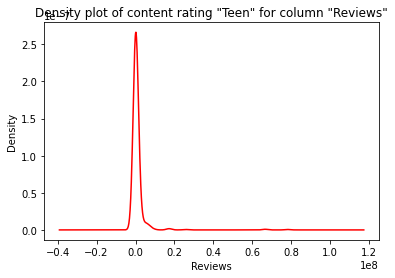

There is no data "Unrated" for column "Rating"


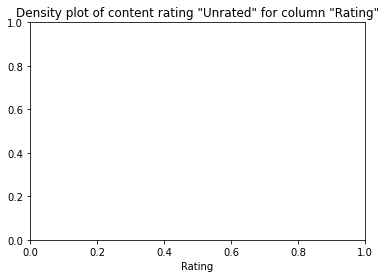

There is no data "Unrated" for column "Installs"


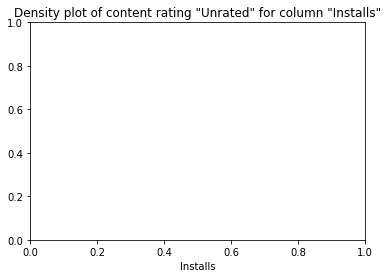

There is no data "Unrated" for column "Reviews"


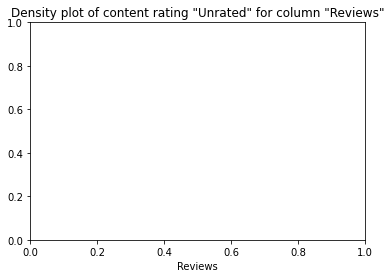

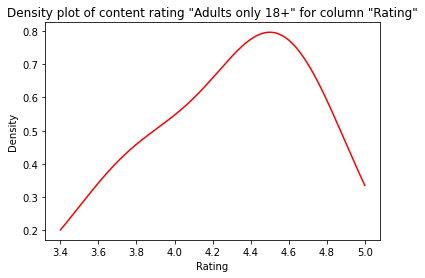

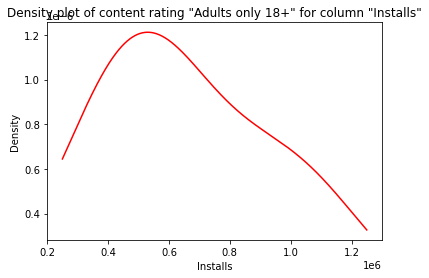

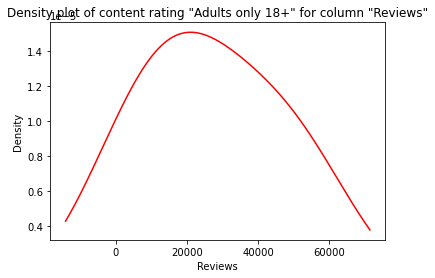

In [40]:
chart_density_rating_app()

<b>Zestawienie ilości aplikacji w stosunku do liczby pobrań dla danej kategorii:</b>

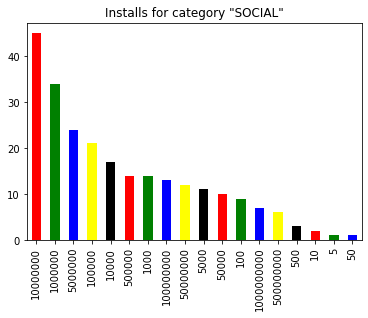

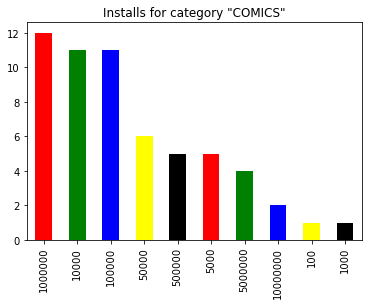

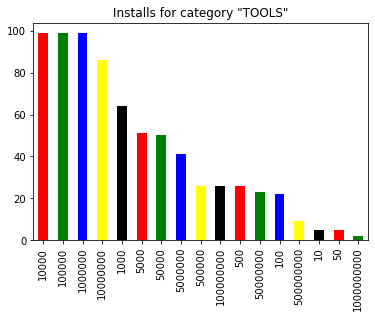

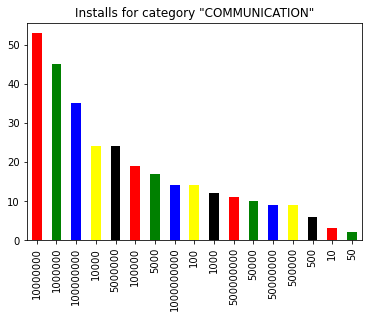

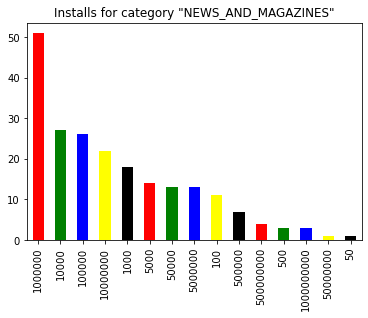

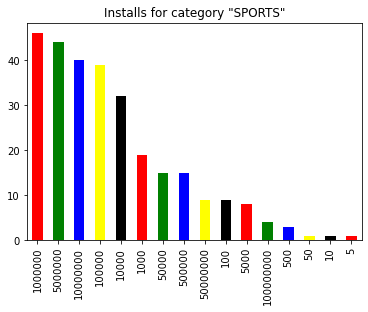

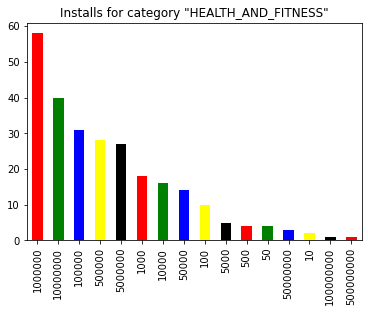

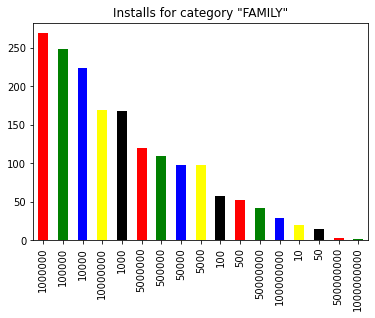

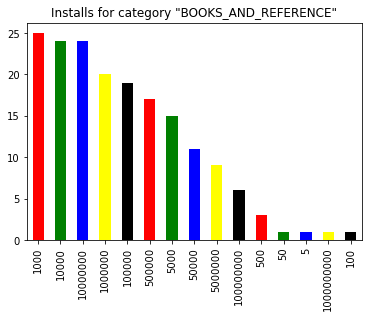

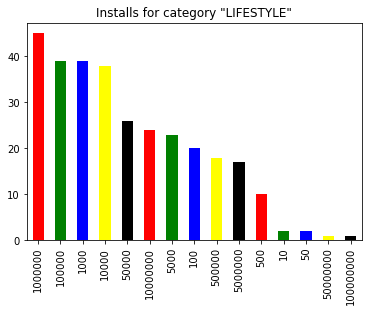

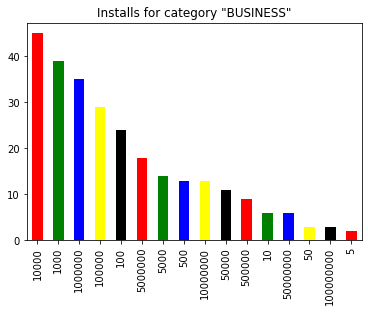

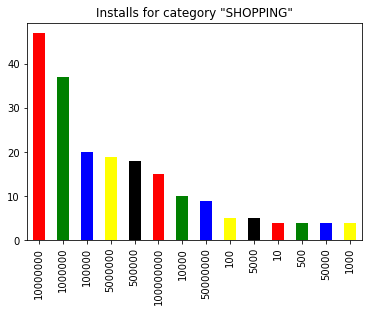

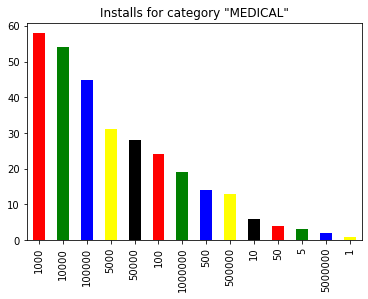

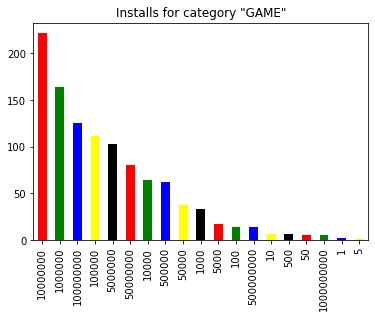

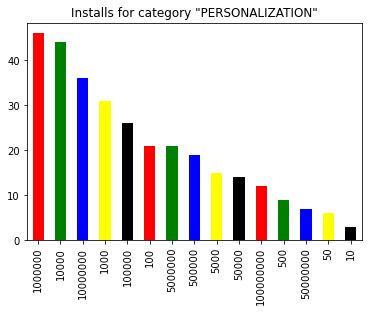

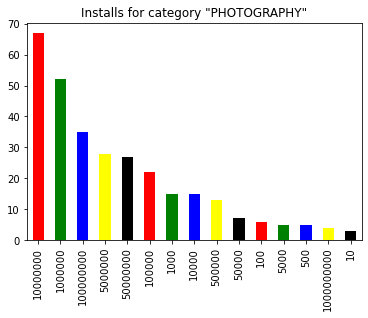

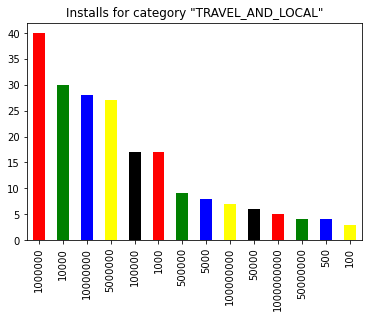

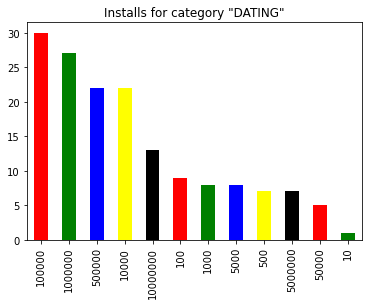

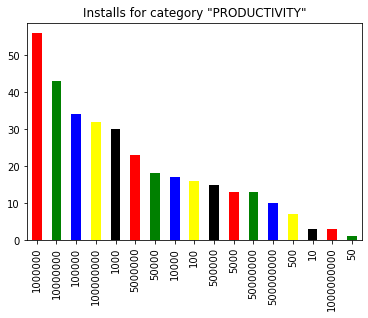

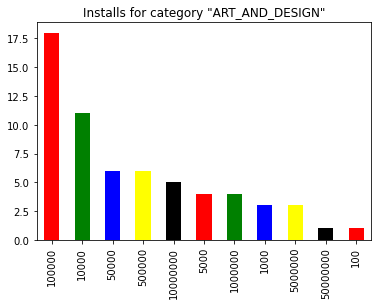

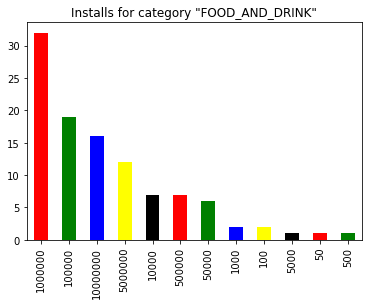

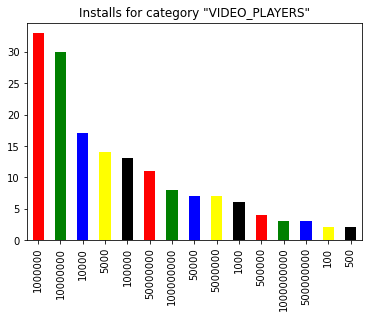

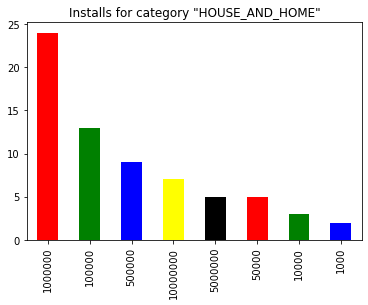

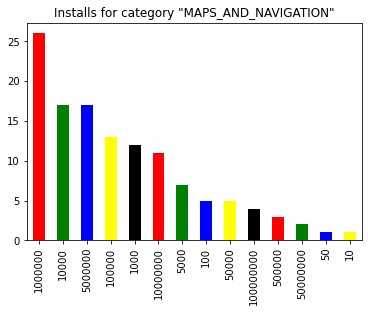

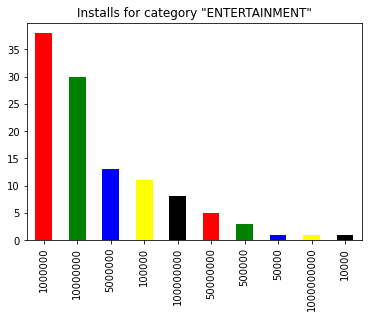

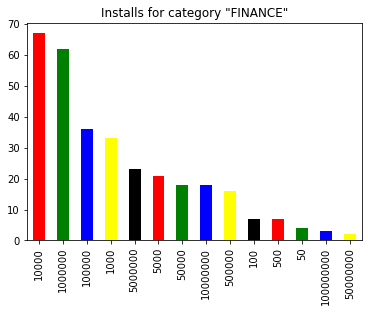

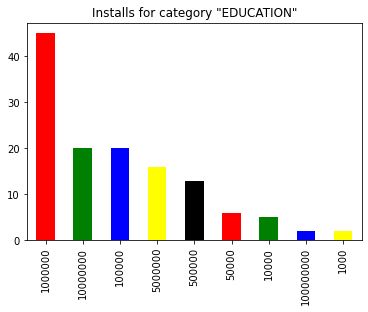

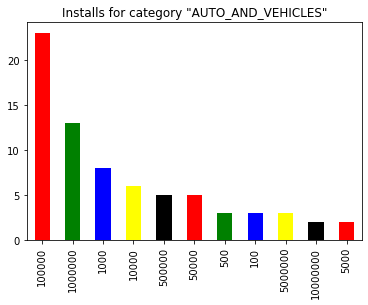

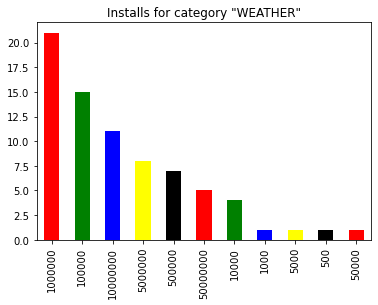

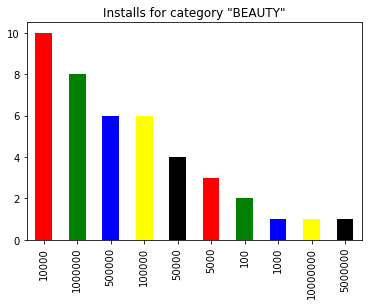

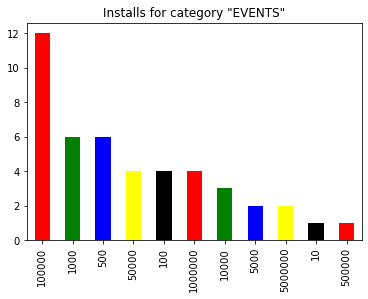

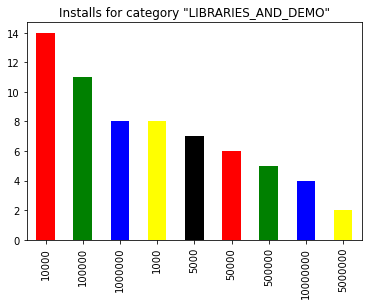

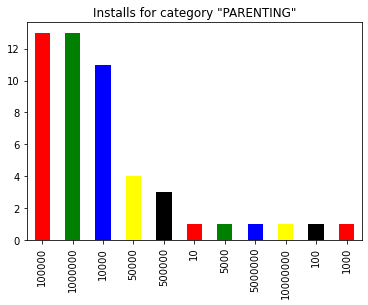

In [41]:
installs_category_no()

<b>Badane cechy 'Size mb' - statystyka obrazująca ilość aplikacji bez przypisanej wartosci :</b>

posiadamy dane o rozmiarze :  7025
Varies with device :  1171


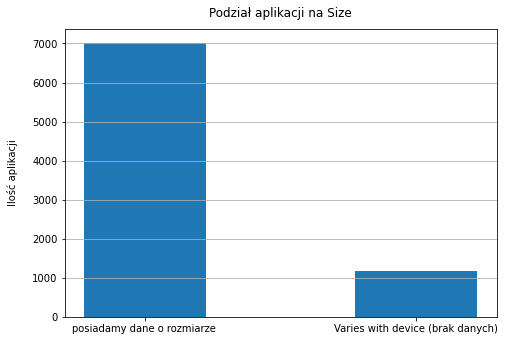

In [42]:
chart_size_data_no_data ()

<b> Statystyka tylko dla wybranych do analizy aplikacji: </b>

In [ ]:
statistic_type()

# <b> Tworzenie scorecardu - opis metodyki: </b>

1. Wykonano zestawienie ilości występowań danej kategorii aplikacji ograniczonego o q = 0.8
2. Wykonano zestawienie ilości występowań danej grupy odbiorców ograniczonej o q = 0.8
3. Wykonano zestawieie ilości występowań danej klasy rozmiaru aplikacji (podział na klasy jako przedziały wartości rozmiarów) ograniczone o q =0.8
4. Dla każdego zestawienia oblicozno punktację zgodnie z definicją: max(ilość wystąpień) / (ilość wystąpień) = score
5. Punktacje dla kategorii, rozmiaru oraz odbiorców dodano do siebie
6. Aby wyróżnić znaczenie apliakcji darmowej jako miarę popularności - powyższą sumę przemnożono przez stosunek ilości pobran aplikacji darmowej do płatnej.

<h1><center><b><font color='green'> SCORECARD </font></b></center></h1>

## <center>🥇🥈 🥉</center>

In [43]:
display(rev_scores)
display(content_scores)


,Category,Category Score
0,BUSINESS,2.0
1,COMMUNICATION,9.0
2,ENTERTAINMENT,3.0
3,FAMILY,41.0
4,FINANCE,4.0
5,GAME,112.0
6,LIFESTYLE,3.0
7,MAPS_AND_NAVIGATION,1.0
8,NEWS_AND_MAGAZINES,1.0
9,PARENTING,1.0


,Content Rating,Score content
0,Everyone,15.0
3,Teen,6.0
1,Everyone 10+,2.0
2,Mature 17+,1.0


In [44]:
file2 = file.drop_duplicates(subset="Total", keep='first')
cm = sns.light_palette('green', as_cmap=True)
s = file2.style.background_gradient(cmap=cm, low=0, high=1, axis=0)
display(s)

,Category,Type,Size mb,Content Rating,Category Score,Score content,Score size,Total
3449,GAME,Free,58.000,Everyone,112.000,15.000,21.000,9116.800
5165,GAME,Free,24.000,Everyone,112.000,15.000,17.000,8870.400
3243,GAME,Free,11.000,Everyone,112.000,15.000,16.000,8808.800
3350,GAME,Free,41.000,Everyone,112.000,15.000,14.000,8685.600
6719,GAME,Free,94.000,Everyone,112.000,15.000,12.000,8562.400
1686,GAME,Free,74.000,Everyone,112.000,15.000,10.000,8439.200
4171,GAME,Free,57.000,Everyone 10+,112.000,2.000,21.000,8316.000
4525,GAME,Free,58.000,Mature 17+,112.000,1.000,21.000,8254.400
5140,GAME,Free,85.000,Everyone,112.000,15.000,5.000,8131.200
1737,GAME,Free,24.000,Everyone 10+,112.000,2.000,17.000,8069.600


<h1><center><b><font color ='gold'>Na podstawie powyższego zestawienia najpopularniejszymi aplikacjami są te, które są z dziedziny gamingowej dedykowane dla każdego użytkownika, będące bezpłatne. Zazwyczaj te aplikacje mają ok 50 Mb rozmiaru.</font></b></center></h1>

<h1><center>Teraz Twoja kolej! Spróbuj wbić się w rynek, sprawdź czy aplikacja, którą chesz utworzyć ma szansę powodzenia ! 😉😉 🔥🔥🔥</center></h1>

In [3]:
display(widgets.HBox([left_box, right_box]))